In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
grid_size = 9
gamma = 0.9

In [3]:
actions = ['up', 'down', 'left', 'right']
action_vectors = {
    'up': (-1, 0),
    'down': (1, 0),
    'left': (0, -1),
    'right': (0, 1)
}

In [4]:
start_position = (8, 0)
goal_position = (0, 8)
portal_in = (6, 2)
portal_out = (2, 6)

In [5]:
rewards = np.zeros((grid_size, grid_size))
rewards[goal] = 1

In [7]:
def transition(state, action):
    x, y = state
    if (x, y) == portal_in:
        return portal_out
    dx, dy = action_vectors[action]
    new_state = (x + dx, y + dy)
    if 0 <= new_state[0] < grid_size and 0 <= new_state[1] < grid_size:
        return new_state
    return state

In [8]:
# Value Iteration
def value_iteration():
    V = np.zeros((grid_size, grid_size))
    policy = np.full((grid_size, grid_size), 'up', dtype='<U6')

    while True:
        delta = 0
        new_V = np.copy(V)
        for x in range(grid_size):
            for y in range(grid_size):
                state = (x, y)
                if state == goal:
                    continue
                q_values = []
                for action in actions:
                    next_state = transition(state, action)
                    reward = rewards[next_state]
                    q_value = reward + gamma * V[next_state]
                    q_values.append(q_value)
                new_V[state] = max(q_values)
                policy[state] = actions[np.argmax(q_values)]
        delta = max(delta, np.abs(new_V - V).max())
        V = new_V
        if delta < 1e-4:
            break
    return V, policy

In [15]:
#plot function

def plot_policy(policy):
    plt.figure(figsize=(8, 8))
    X, Y = np.meshgrid(range(grid_size), range(grid_size))
    U = np.zeros_like(X, dtype=float)
    V = np.zeros_like(Y, dtype=float)

    for x in range(grid_size):
        for y in range(grid_size):
            action = policy[x, y]
            dx, dy = action_vectors[action]
            U[x, y] = dy
            V[x, y] = -dx

    plt.fill_between([start[1], start[1] + 1], start[0], start[0] + 1, color='red', alpha=0.7, label='Start')
    plt.fill_between([goal[1], goal[1] + 1], goal[0], goal[0] + 1, color='green', alpha=0.7, label='Goal')
    plt.fill_between([portal_in[1], portal_in[1] + 1], portal_in[0], portal_in[0] + 1, color='blue', alpha=0.7, label='Portal In')
    plt.fill_between([portal_out[1], portal_out[1] + 1], portal_out[0], portal_out[0] + 1, color='yellow', alpha=0.7, label='Portal Out')

    plt.quiver(Y, X, U, V, color='black', scale=1, scale_units='xy', angles='xy', width=0.005)

    plt.xticks(range(grid_size))
    plt.yticks(range(grid_size))
    plt.grid(which='both', color='black', linestyle='--', linewidth=0.5)
    plt.gca().invert_yaxis()
    plt.title("Optimal Policy Visualization")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.gca().set_aspect('equal')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), borderaxespad=0., ncol=2)
    plt.show()

In [11]:
V_vi, policy_vi = value_iteration()
print("The Optimal Value Function (Value Iteration):\n", V_vi)

The Optimal Value Function (Value Iteration):
 [[0.4782969  0.531441   0.59049    0.6561     0.729      0.81
  0.9        1.         0.        ]
 [0.43046721 0.4782969  0.531441   0.59049    0.6561     0.729
  0.81       0.9        1.        ]
 [0.38742049 0.43046721 0.4782969  0.531441   0.59049    0.6561
  0.729      0.81       0.9       ]
 [0.38742049 0.43046721 0.4782969  0.4782969  0.531441   0.59049
  0.6561     0.729      0.81      ]
 [0.43046721 0.4782969  0.531441   0.4782969  0.4782969  0.531441
  0.59049    0.6561     0.729     ]
 [0.4782969  0.531441   0.59049    0.531441   0.4782969  0.4782969
  0.531441   0.59049    0.6561    ]
 [0.531441   0.59049    0.6561     0.59049    0.531441   0.4782969
  0.4782969  0.531441   0.59049   ]
 [0.4782969  0.531441   0.59049    0.531441   0.4782969  0.43046721
  0.43046721 0.4782969  0.531441  ]
 [0.43046721 0.4782969  0.531441   0.4782969  0.43046721 0.38742049
  0.38742049 0.43046721 0.4782969 ]]


In [13]:
print("The Optimal Policy (Value Iteration):\n", policy_vi)

The Optimal Policy (Value Iteration):
 [['right' 'right' 'right' 'right' 'right' 'right' 'right' 'right' 'up']
 ['up' 'up' 'up' 'up' 'up' 'up' 'up' 'up' 'up']
 ['up' 'up' 'up' 'up' 'up' 'up' 'up' 'up' 'up']
 ['down' 'down' 'down' 'up' 'up' 'up' 'up' 'up' 'up']
 ['down' 'down' 'down' 'down' 'up' 'up' 'up' 'up' 'up']
 ['down' 'down' 'down' 'down' 'down' 'up' 'up' 'up' 'up']
 ['right' 'right' 'up' 'left' 'left' 'left' 'up' 'up' 'up']
 ['up' 'up' 'up' 'up' 'up' 'up' 'up' 'up' 'up']
 ['up' 'up' 'up' 'up' 'up' 'up' 'up' 'up' 'up']]


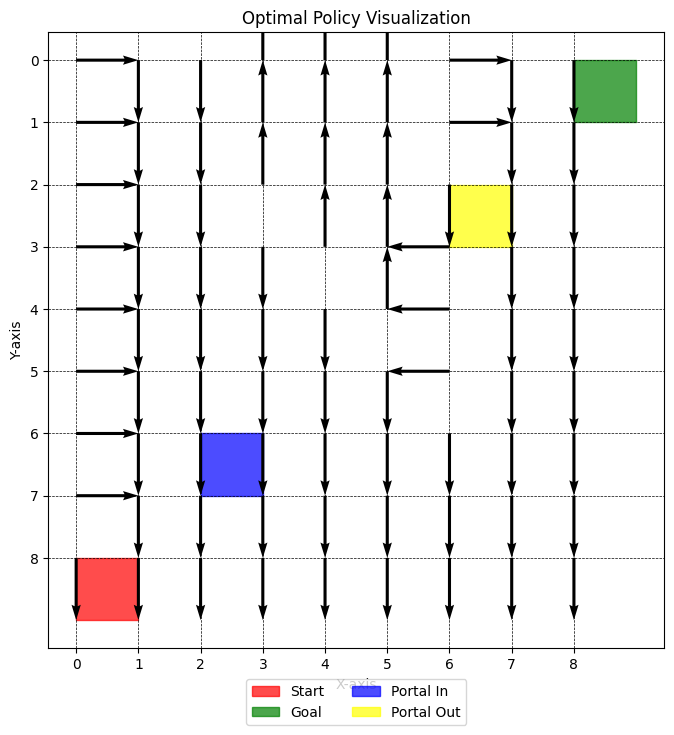

In [16]:
plot_policy(policy_vi)

In [22]:
#Policy iteration


def policy_iteration():
    V = np.zeros((grid_size, grid_size))
    policy = np.full((grid_size, grid_size), 'up', dtype='<U6')

    while True:
        # Policy Evaluation
        while True:
            delta = 0
            new_V = np.copy(V)
            for x in range(grid_size):
                for y in range(grid_size):
                    state = (x, y)
                    if state == goal:
                        continue
                    action = policy[state]
                    next_state = transition(state, action)
                    reward = rewards[next_state]
                    new_V[state] = reward + gamma * V[next_state]
            delta = max(delta, np.abs(new_V - V).max())
            V = new_V
            if delta < 1e-4:
                break

        # Policy Improvement
        policy_stable = True
        for x in range(grid_size):
            for y in range(grid_size):
                state = (x, y)
                if state == goal:
                    continue
                old_action = policy[state]
                q_values = []
                for action in actions:
                    next_state = transition(state, action)
                    reward = rewards[next_state]
                    q_value = reward + gamma * V[next_state]
                    q_values.append(q_value)
                new_action = actions[np.argmax(q_values)]
                policy[state] = new_action
                if new_action != old_action:
                    policy_stable = False
        if policy_stable:
            break
    return V, policy

V_pi, policy_pi = policy_iteration()

In [19]:
print("The Optimal Value Function (Policy Iteration):\n", V_pi)

The Optimal Value Function (Policy Iteration):
 [[0.4782969  0.531441   0.59049    0.6561     0.729      0.81
  0.9        1.         0.        ]
 [0.43046721 0.4782969  0.531441   0.59049    0.6561     0.729
  0.81       0.9        1.        ]
 [0.38742049 0.43046721 0.4782969  0.531441   0.59049    0.6561
  0.729      0.81       0.9       ]
 [0.38742049 0.43046721 0.4782969  0.4782969  0.531441   0.59049
  0.6561     0.729      0.81      ]
 [0.43046721 0.4782969  0.531441   0.4782969  0.4782969  0.531441
  0.59049    0.6561     0.729     ]
 [0.4782969  0.531441   0.59049    0.531441   0.4782969  0.4782969
  0.531441   0.59049    0.6561    ]
 [0.531441   0.59049    0.6561     0.59049    0.531441   0.4782969
  0.4782969  0.531441   0.59049   ]
 [0.4782969  0.531441   0.59049    0.531441   0.4782969  0.43046721
  0.43046721 0.4782969  0.531441  ]
 [0.43046721 0.4782969  0.531441   0.4782969  0.43046721 0.38742049
  0.38742049 0.43046721 0.4782969 ]]


In [20]:
print("The Optimal Policy (Policy Iteration):\n", policy_pi)

The Optimal Policy (Policy Iteration):
 [['right' 'right' 'right' 'right' 'right' 'right' 'right' 'right' 'up']
 ['up' 'up' 'up' 'up' 'up' 'up' 'up' 'up' 'up']
 ['up' 'up' 'up' 'up' 'up' 'up' 'up' 'up' 'up']
 ['down' 'down' 'down' 'up' 'up' 'up' 'up' 'up' 'up']
 ['down' 'down' 'down' 'down' 'up' 'up' 'up' 'up' 'up']
 ['down' 'down' 'down' 'down' 'down' 'up' 'up' 'up' 'up']
 ['right' 'right' 'up' 'left' 'left' 'left' 'up' 'up' 'up']
 ['up' 'up' 'up' 'up' 'up' 'up' 'up' 'up' 'up']
 ['up' 'up' 'up' 'up' 'up' 'up' 'up' 'up' 'up']]


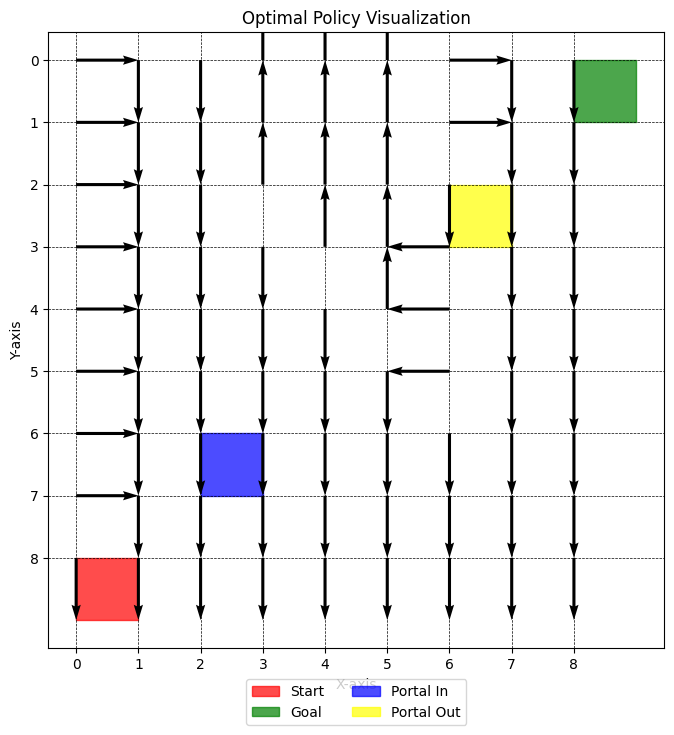

In [21]:
plot_policy(policy_pi)